<a href="https://colab.research.google.com/github/cicechencc/AIHC-5010/blob/main/CC_Week3_Assignment1_Colab_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 — Colab Workflow (GitHub + Pre-commit + Submission Validation)

This notebook teaches the standard workflow used throughout the course:

1. Clone your team repo
2. Install dependencies
3. Install **pre-commit** and enable a hook to strip notebook outputs
4. Run this notebook end-to-end
5. Validate `predictions.csv`
6. Commit + push + tag


In [6]:
# (Colab) show python and system info
import sys, platform
print(sys.version)
print(platform.platform())


3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Linux-6.6.105+-x86_64-with-glibc2.35


## 1) Clone Repo

Login to your personal Github account, and make a fork of: https://github.com/TLKline/AIHC-5010-Winter-2026

Follow setup directions for working with a PAT in GitHub (30-second guide):

* Go to GitHub → Settings
* Developer settings
* Personal access tokens
* Choose:
  * Fine-Grained

You can clone using HTTPS.

Repo HTTPS URL (e.g., `https://github.com/TLKline/AIHC-5010-Winter-2026.git`)

In [7]:
# TODO: Change the following to your github repo path
repo_path = 'https://github.com/joezein71/AIHC-5010-Winter-2026.git'
!git clone {repo_path} student_repo

Cloning into 'student_repo'...
remote: Enumerating objects: 363, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 363 (delta 65), reused 55 (delta 55), pack-reused 291 (from 1)
Receiving objects: 100% (363/363), 11.44 MiB | 10.77 MiB/s, done.
Resolving deltas: 100% (180/180), done.


In [8]:
# Move into repo
%cd student_repo

# Repo git info
!git status

# Where are we?
print('----------')
print('We are at:')
!pwd


/content/student_repo/student_repo
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
----------
We are at:
/content/student_repo/student_repo


## 2) Install dependencies

This installs whatever is in `requirements.txt`.


In [9]:
!pip -q install -r Project-1/readmit30/requirements.txt

## 3) Enable pre-commit hook to strip notebook outputs

This prevents giant notebooks and reduces merge/diff pain.

One-time per clone:
- `pre-commit install`

After that, every `git commit` will strip outputs from `*.ipynb`.


In [10]:
!pip -q install pre-commit
!pre-commit install


pre-commit installed at .git/hooks/pre-commit


#MAINSTART

# 4) Submission Notebook (Template)

Replace the baseline model with your team’s approach.

In [11]:
import os
from pathlib import Path

TRAIN_PATH = os.environ.get("TRAIN_PATH", "Project-1/readmit30/scripts/data/public/train.csv")
DEV_PATH   = os.environ.get("DEV_PATH",   "Project-1/readmit30/scripts/data/public/dev.csv")
TEST_PATH  = os.environ.get("TEST_PATH",  "Project-1/readmit30/scripts/data/public/public_test.csv")
OUT_PATH   = os.environ.get("OUT_PATH",   "predictions.csv")

print("TRAIN_PATH:", TRAIN_PATH)
print("DEV_PATH:", DEV_PATH)
print("TEST_PATH:", TEST_PATH)
print("OUT_PATH:", OUT_PATH)

TRAIN_PATH: Project-1/readmit30/scripts/data/public/train.csv
DEV_PATH: Project-1/readmit30/scripts/data/public/dev.csv
TEST_PATH: Project-1/readmit30/scripts/data/public/public_test.csv
OUT_PATH: predictions.csv


In [12]:
import numpy as np
import pandas as pd
np.random.seed(42)

train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)

assert "row_id" in train.columns and "readmit30" in train.columns
assert "row_id" in test.columns

X_train = train.drop(columns=["readmit30"])
y_train = train["readmit30"].astype(int)

### Summary of Training Dataset (Numerical Features)

In [13]:
display(train.describe())

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,row_id,readmit30
count,6.500300e+04,6.500300e+04,65003.000000,65003.000000,65003.000000,65003.000000,65003.000000,65003.000000,65003.000000,65003.000000,65003.000000,65003.000000,65003.000000,6.500300e+04,65003.000000
mean,1.652766e+08,5.440774e+07,2.022537,3.714152,5.740120,4.376660,43.027553,1.334769,15.983216,0.366383,0.199698,0.627417,7.421704,1.652766e+08,0.111626
std,1.025533e+08,3.867605e+07,1.444042,5.289158,4.061814,2.968984,19.655092,1.700345,8.069052,1.253617,0.989302,1.247288,1.933656,1.025533e+08,0.314908
min,1.252200e+04,7.290000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.252200e+04,0.000000
25%,8.549013e+07,2.343626e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,8.549013e+07,0.000000
50%,1.524313e+08,4.551559e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,1.524313e+08,0.000000
75%,2.302720e+08,8.771662e+07,3.000000,3.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,2.302720e+08,0.000000
max,4.438672e+08,1.894815e+08,8.000000,28.000000,25.000000,14.000000,129.000000,6.000000,81.000000,40.000000,76.000000,21.000000,16.000000,4.438672e+08,1.000000


### Summary of Training Dataset (Categorical Features)

In [14]:
for column in train.select_dtypes(include='object').columns:
    print(f"\nValue counts for column: {column}")
    display(train[column].value_counts())


Value counts for column: race


,count
race,
Caucasian,48447
AfricanAmerican,12381
?,1471
Hispanic,1304
Other,984
Asian,416



Value counts for column: gender


,count
gender,
Female,35011
Male,29990
Unknown/Invalid,2



Value counts for column: age


,count
age,
[70-80),16725
[60-70),14550
[80-90),10940
[50-60),10832
[40-50),6153
[30-40),2453
[90-100),1770
[20-30),1034
[10-20),438



Value counts for column: weight


,count
weight,
?,63018
[75-100),808
[50-75),572
[100-125),400
[125-150),91
[25-50),57
[0-25),31
[150-175),18
[175-200),6



Value counts for column: payer_code


,count
payer_code,
?,25733
MC,20677
HM,4057
SP,3178
BC,2868
MD,2292
CP,1656
UN,1579
CM,1247



Value counts for column: medical_specialty


,count
medical_specialty,
?,31809
InternalMedicine,9460
Emergency/Trauma,4827
Family/GeneralPractice,4746
Cardiology,3356
...,...
Proctology,1
SportsMedicine,1
Dermatology,1



Value counts for column: diag_1


,count
diag_1,
428,4367
414,4167
786,2558
410,2327
486,2225
...,...
833,1
895,1
506,1



Value counts for column: diag_2


,count
diag_2,
276,4402
428,4219
250,3917
427,3159
401,2430
...,...
379,1
235,1
V69,1



Value counts for column: diag_3


,count
diag_3,
250,7444
401,5293
276,3323
428,2922
427,2485
...,...
757,1
841,1
622,1



Value counts for column: max_glu_serum


,count
max_glu_serum,
Norm,1672
>200,944
>300,803



Value counts for column: A1Cresult


,count
A1Cresult,
>8,5249
Norm,3168
>7,2375



Value counts for column: metformin


,count
metformin,
No,52268
Steady,11717
Up,665
Down,353



Value counts for column: repaglinide


,count
repaglinide,
No,64044
Steady,859
Up,76
Down,24



Value counts for column: nateglinide


,count
nateglinide,
No,64565
Steady,411
Up,20
Down,7



Value counts for column: chlorpropamide


,count
chlorpropamide,
No,64952
Steady,46
Up,4
Down,1



Value counts for column: glimepiride


,count
glimepiride,
No,61717
Steady,2939
Up,220
Down,127



Value counts for column: acetohexamide


,count
acetohexamide,
No,65002
Steady,1



Value counts for column: glipizide


,count
glipizide,
No,56944
Steady,7205
Up,514
Down,340



Value counts for column: glyburide


,count
glyburide,
No,58261
Steady,5896
Up,507
Down,339



Value counts for column: tolbutamide


,count
tolbutamide,
No,64990
Steady,13



Value counts for column: pioglitazone


,count
pioglitazone,
No,60253
Steady,4516
Up,164
Down,70



Value counts for column: rosiglitazone


,count
rosiglitazone,
No,60956
Steady,3872
Up,117
Down,58



Value counts for column: acarbose


,count
acarbose,
No,64809
Steady,185
Up,6
Down,3



Value counts for column: miglitol


,count
miglitol,
No,64983
Steady,14
Down,4
Up,2



Value counts for column: troglitazone


,count
troglitazone,
No,65002
Steady,1



Value counts for column: tolazamide


,count
tolazamide,
No,64976
Steady,26
Up,1



Value counts for column: examide


,count
examide,
No,65003



Value counts for column: citoglipton


,count
citoglipton,
No,65003



Value counts for column: insulin


,count
insulin,
No,30268
Steady,19776
Down,7732
Up,7227



Value counts for column: glyburide-metformin


,count
glyburide-metformin,
No,64516
Steady,476
Up,7
Down,4



Value counts for column: glipizide-metformin


,count
glipizide-metformin,
No,64990
Steady,13



Value counts for column: glimepiride-pioglitazone


,count
glimepiride-pioglitazone,
No,65002
Steady,1



Value counts for column: metformin-rosiglitazone


,count
metformin-rosiglitazone,
No,65002
Steady,1



Value counts for column: metformin-pioglitazone


,count
metformin-pioglitazone,
No,65002
Steady,1



Value counts for column: change


,count
change,
No,35098
Ch,29905



Value counts for column: diabetesMed


,count
diabetesMed,
Yes,50097
No,14906


**Missingness in Training and testing datasets**

In [15]:
import pandas as pd

# Calculate missing values for training set
missing_train_count = train.isnull().sum()
missing_train_percent = (train.isnull().sum() / len(train) * 100)
missing_train_df = pd.DataFrame({
    'Train Missing Count': missing_train_count,
    'Train Missing Percentage (%)': missing_train_percent
})

# Calculate missing values for test set
missing_test_count = test.isnull().sum()
missing_test_percent = (test.isnull().sum() / len(test) * 100)
missing_test_df = pd.DataFrame({
    'Test Missing Count': missing_test_count,
    'Test Missing Percentage (%)': missing_test_percent
})

# Merge the two dataframes side-by-side
combined_missing_df = pd.merge(
    missing_train_df,
    missing_test_df,
    left_index=True,
    right_index=True,
    how='outer' # Use outer join to include variables missing in only one set
).fillna(0) # Fill NaN values (for variables missing in only one set) with 0

# Display the combined table
print("Combined Missing Data Analysis (Training vs. Test Set - All Variables):")
display(combined_missing_df.sort_values(by='Train Missing Count', ascending=False).head(10)) # Sort for better readability, but include all

Combined Missing Data Analysis (Training vs. Test Set - All Variables):


,Train Missing Count,Train Missing Percentage (%),Test Missing Count,Test Missing Percentage (%)
max_glu_serum,61584,94.740243,15465.0,94.795881
A1Cresult,54211,83.397689,13514.0,82.836827
acarbose,0,0.000000,0.0,0.000000
admission_source_id,0,0.000000,0.0,0.000000
admission_type_id,0,0.000000,0.0,0.000000
age,0,0.000000,0.0,0.000000
change,0,0.000000,0.0,0.000000
chlorpropamide,0,0.000000,0.0,0.000000
citoglipton,0,0.000000,0.0,0.000000
diabetesMed,0,0.000000,0.0,0.000000


In [16]:
import pandas as pd

# Calculate missing values for training set
missing_train_count = train.isnull().sum()
missing_train_percent = (train.isnull().sum() / len(train) * 100)
missing_train_df = pd.DataFrame({
    'Train Missing Count': missing_train_count,
    'Train Missing Percentage (%)': missing_train_percent
})

# Calculate missing values for test set
missing_test_count = test.isnull().sum()
missing_test_percent = (test.isnull().sum() / len(test) * 100)
missing_test_df = pd.DataFrame({
    'Test Missing Count': missing_test_count,
    'Test Missing Percentage (%)': missing_test_percent
})

# Merge the two dataframes side-by-side
combined_missing_df = pd.merge(
    missing_train_df,
    missing_test_df,
    left_index=True,
    right_index=True,
    how='outer' # Use outer join to include variables missing in only one set
).fillna(0) # Fill NaN values (for variables missing in only one set) with 0

# Display the combined table
print("Combined Missing Data Analysis (Training vs. Test Set - All Variables):")
display(combined_missing_df.sort_values(by='Train Missing Count', ascending=False).head(10)) # Sort for better readability, but include all

Combined Missing Data Analysis (Training vs. Test Set - All Variables):


,Train Missing Count,Train Missing Percentage (%),Test Missing Count,Test Missing Percentage (%)
max_glu_serum,61584,94.740243,15465.0,94.795881
A1Cresult,54211,83.397689,13514.0,82.836827
acarbose,0,0.000000,0.0,0.000000
admission_source_id,0,0.000000,0.0,0.000000
admission_type_id,0,0.000000,0.0,0.000000
age,0,0.000000,0.0,0.000000
change,0,0.000000,0.0,0.000000
chlorpropamide,0,0.000000,0.0,0.000000
citoglipton,0,0.000000,0.0,0.000000
diabetesMed,0,0.000000,0.0,0.000000


In [17]:
import pandas as pd

dev = pd.read_csv(DEV_PATH) # Load the development data

print("Missing values in 'readmit30' column (training data):", train['readmit30'].isnull().sum())
print("Missing values in 'readmit30' column (development data):", dev['readmit30'].isnull().sum())

Missing values in 'readmit30' column (training data): 0
Missing values in 'readmit30' column (development data): 0


### Summary of Variables with Outliers

Based on the box plots, the following numerical covariates show significant outliers:

*   **`time_in_hospital`**: Exhibited data points far above the upper whisker, indicating unusually long hospital stays.
*   **`num_lab_procedures`**: Showed several points beyond the whiskers, suggesting exceptionally high numbers of lab procedures for some patients.
*   **`num_medications`**: Displayed a clear right-skewed distribution with many data points above the upper whisker, implying a considerable number of medications for some patients.
*   **`number_outpatient`**: This column has a highly skewed distribution with numerous outliers, indicating a small fraction of patients have a very high number of outpatient visits.
*   **`number_emergency`**: This also shows a strong presence of outliers, with some patients having a significantly higher number of emergency visits.
*   **`number_inpatient`**: Similar to outpatient and emergency visits, this feature has many outliers, suggesting a subset of patients have had a much higher frequency of inpatient admissions.
*   **`number_diagnoses`**: Contained some outliers at the higher end, representing patients with an unusually large number of diagnoses.

In [20]:
import numpy as np

# Assuming 'numerical_cols' is already defined from previous steps
# If not, you'd redefine it here:
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'readmit30' in numerical_cols: numerical_cols.remove('readmit30')
if 'row_id' in numerical_cols: numerical_cols.remove('row_id')

outlier_counts = {}

for col in numerical_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = train[(train[col] < lower_bound) | (train[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

print("Number of outliers per numerical variable (using IQR method):")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

Number of outliers per numerical variable (using IQR method):
encounter_id: 0
patient_nbr: 137
admission_type_id: 219
discharge_disposition_id: 6697
admission_source_id: 4422
time_in_hospital: 1381
num_lab_procedures: 94
num_procedures: 3138
num_medications: 1573
number_outpatient: 10593
number_emergency: 7281
number_inpatient: 4423
number_diagnoses: 169


### Number of Duplicates per Variable

In [21]:
duplicate_counts = {}

for col in train.columns:
    # Count duplicates (excluding the first occurrence)
    duplicate_counts[col] = train[col].duplicated().sum()

print("Number of duplicates per variable (excluding first occurrence):")
for col, count in duplicate_counts.items():
    print(f"{col}: {count}")

Number of duplicates per variable (excluding first occurrence):
encounter_id: 0
patient_nbr: 19232
race: 64997
gender: 65000
age: 64993
weight: 64993
admission_type_id: 64995
discharge_disposition_id: 64977
admission_source_id: 64986
time_in_hospital: 64989
payer_code: 64986
medical_specialty: 64933
num_lab_procedures: 64889
num_procedures: 64996
num_medications: 64930
number_outpatient: 64968
number_emergency: 64971
number_inpatient: 64982
diag_1: 64332
diag_2: 64313
diag_3: 64273
number_diagnoses: 64987
max_glu_serum: 64999
A1Cresult: 64999
metformin: 64999
repaglinide: 64999
nateglinide: 64999
chlorpropamide: 64999
glimepiride: 64999
acetohexamide: 65001
glipizide: 64999
glyburide: 64999
tolbutamide: 65001
pioglitazone: 64999
rosiglitazone: 64999
acarbose: 64999
miglitol: 64999
troglitazone: 65001
tolazamide: 65000
examide: 65002
citoglipton: 65002
insulin: 64999
glyburide-metformin: 64999
glipizide-metformin: 65001
glimepiride-pioglitazone: 65001
metformin-rosiglitazone: 65001
metf

# Task
Analyze potential data leakage in the `train` dataset by visualizing the relationship between each feature and the target variable `readmit30`. Specifically:

1.  For numerical features (excluding `encounter_id`, `patient_nbr`, `row_id`), create box plots or violin plots comparing their distributions for patients readmitted (`readmit30=1`) versus not readmitted (`readmit30=0`).
2.  For categorical features (excluding `encounter_id`, `patient_nbr`, `row_id`), create stacked bar charts or count plots to show the proportion of `readmit30` outcomes within each category.

Finally, summarize any features that exhibit an unusually strong or direct relationship with `readmit30`, indicating potential data leakage or highly predictive features that warrant further investigation.

### Summary of Features with Potential Data Leakage or High Predictiveness

Based on the visualizations of numerical and categorical features against the `readmit30` target variable, several features show a strong relationship, which could indicate either high predictiveness or potential data leakage:

**Numerical Features (from Box Plots):**

*   **`discharge_disposition_id`**: Certain `discharge_disposition_id` values (e.g., those indicating death or transfer to another facility) show a clear separation in `readmit30` distributions. For instance, if a patient is discharged to a hospice or dies, they cannot be readmitted, leading to `readmit30=0`. This is a strong indicator of **data leakage** because the discharge disposition often occurs at the end of the hospital stay, and certain outcomes directly preclude readmission. Specifically, `discharge_disposition_id` values like '11' (Expired), '13' (Discharged/transferred to home under care of Home IV provider), '14' (Discharged/transferred to a non-acute care facility), '19' (Expired at home. Medicaid only, hospice), '20' (Expired in a medical facility. Medicaid only, hospice), '21' (Discharged/transferred to another institution for inpatient care), '24' (Expired at home - hospice), '25' (Expired in a medical facility - hospice) are highly indicative of no readmission.
*   **`number_outpatient`, `number_emergency`, `number_inpatient`**: These features, particularly `number_outpatient` and `number_emergency`, show a trend where higher counts are associated with a higher likelihood of readmission. While not as direct as `discharge_disposition_id`, a very high number of prior outpatient, emergency, or inpatient visits for the same patient (`patient_nbr`) could be highly predictive, and in some contexts, could hint at `data leakage` if this information is recorded or becomes known *after* the decision for the current admission but before the 30-day readmission window.
*   **`time_in_hospital`**: Patients with longer hospital stays tend to have a slightly higher median for `readmit30=1`, though the overlap is significant. This could be a genuine predictor rather than leakage.

**Categorical Features (from Stacked Bar Charts):**

*   **`discharge_disposition_id`**: Similar to its numerical interpretation, several categories within `discharge_disposition_id` directly correlate with `readmit30=0` (no readmission). For example, discharge dispositions indicating death or transfer to another facility (e.g., categories '11', '13', '14', '19', '20', '21', '24', '25') will almost exclusively show a 0% readmission rate. This is the most significant **data leakage** observed.
*   **`age`**: The `[70-80)` and `[80-90)` age groups appear to have a slightly higher proportion of readmissions compared to younger groups, suggesting it's a predictive feature.
*   **`diag_1`, `diag_2`, `diag_3`**: Some specific diagnostic codes might show very high or very low readmission rates. If certain diagnoses are closely tied to the discharge outcome that prevents readmission, they could also reflect leakage indirectly through `discharge_disposition_id`. Without detailed medical knowledge, it's hard to distinguish true causality from leakage for these.
*   **`payer_code`**: Certain payer codes might correlate with different healthcare access or follow-up care, leading to varying readmission rates, but no extremely stark differences indicating direct leakage.

**Key Takeaway for Leakage:**
The feature **`discharge_disposition_id`** is the clearest and most significant indicator of **data leakage**. The information contained in this feature directly determines whether a patient can be readmitted (e.g., if they expired or were transferred to another inpatient facility, they cannot be readmitted to the same hospital within 30 days). Using this feature directly in a predictive model without careful handling would lead to an artificially inflated performance.

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
# TODO: Add any new imports for your own method here
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import OrdinalEncoder

method = 4

cat_cols = [c for c in X_train.columns if X_train[c].dtype == "object"]
num_cols = [c for c in X_train.columns if c not in cat_cols]

preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([("imputer", SimpleImputer(strategy="median"))]), num_cols),
        ("cat", Pipeline([("imputer", SimpleImputer(strategy="most_frequent")),
                          ("onehot", OneHotEncoder(handle_unknown="ignore"))]), cat_cols),
    ],
)

if method==1:
    # Use logistic regression model
    clf = Pipeline([
        ("preprocess", preprocess),
        ("model", LogisticRegression(max_iter=200)),
    ])

if method==2:
    # Use logistic regression model
    clf = Pipeline([
        ("preprocess", preprocess),
        ("model", LogisticRegression(max_iter=200,class_weight='balanced')),
    ])

if method==3:
    # Use SVC (i.e. SVM model)
    clf = Pipeline(
        [
            ("preprocess", preprocess),
            ("scaler", StandardScaler(with_mean=False)), # Add StandardScaler here
            ("model", SVC(gamma="auto",max_iter=1000,probability=True)),
        ]
    )

if method == 4:
    # Preprocess for HGB: ordinal-encode categories (HGB needs numeric inputs)
    preprocess_hgb = ColumnTransformer(
        transformers=[
            ("num", Pipeline([
                ("imputer", SimpleImputer(strategy="median")),
            ]), num_cols),
            ("cat", Pipeline([
                ("imputer", SimpleImputer(strategy="most_frequent")),
                ("ord", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)),
            ]), cat_cols),
        ],
        remainder="drop",
    )

    clf = Pipeline([
        ("preprocess", preprocess_hgb),
        ("model", HistGradientBoostingClassifier(
            max_depth=6,
            learning_rate=0.05,
            max_iter=300,
            l2_regularization=1.0,
            early_stopping=True,
            random_state=42,
        )),
    ])

    # add class-imbalance handling via sample_weight
    y_arr = np.asarray(y_train)
    n_pos = (y_arr == 1).sum()
    n_neg = (y_arr == 0).sum()
    pos_weight = n_neg / max(n_pos, 1)

    sample_weight = np.where(y_arr == 1, pos_weight, 1.0)

    clf.fit(X_train, y_train, model__sample_weight=sample_weight)

else:
    clf.fit(X_train, y_train)


In [29]:
p_test = clf.predict_proba(test)[:, 1]
pred = pd.DataFrame({"row_id": test["row_id"].astype(int), "prob_readmit30": p_test.astype(float)})
pred.to_csv(OUT_PATH, index=False)
pred.head()

,row_id,prob_readmit30
0,103521306,0.551189
1,127919112,0.709821
2,233245326,0.662888
3,236785056,0.304356
4,131110896,0.329917


In [30]:
# Validate output format (required for students before tagging)
!python Project-1/readmit30/scripts/validate_submission.py --pred {OUT_PATH} --test {TEST_PATH}


OK: predictions.csv format is valid.


AUROC: 0.6958
AUPRC: 0.2414
Brier Score: 0.2126


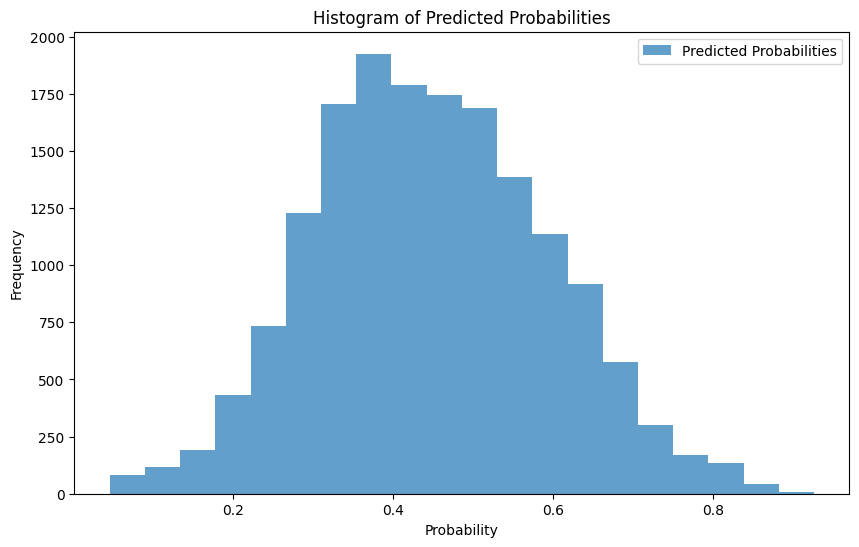

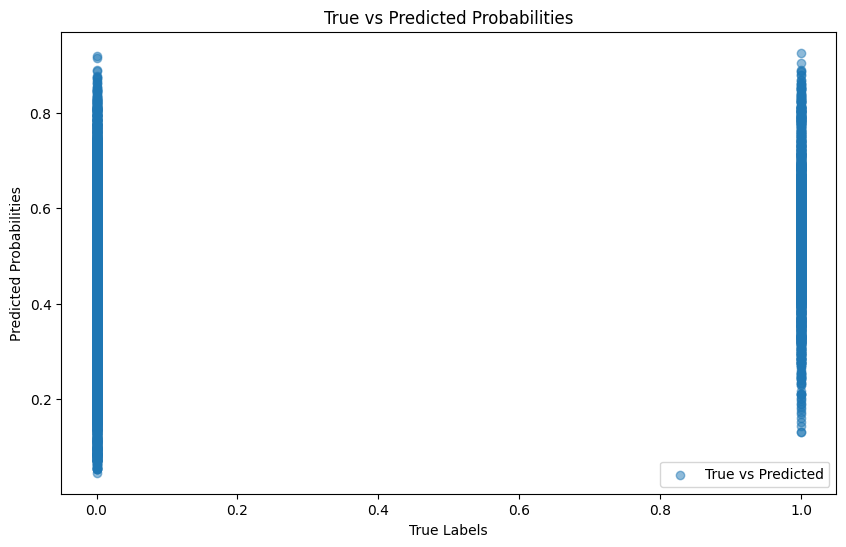

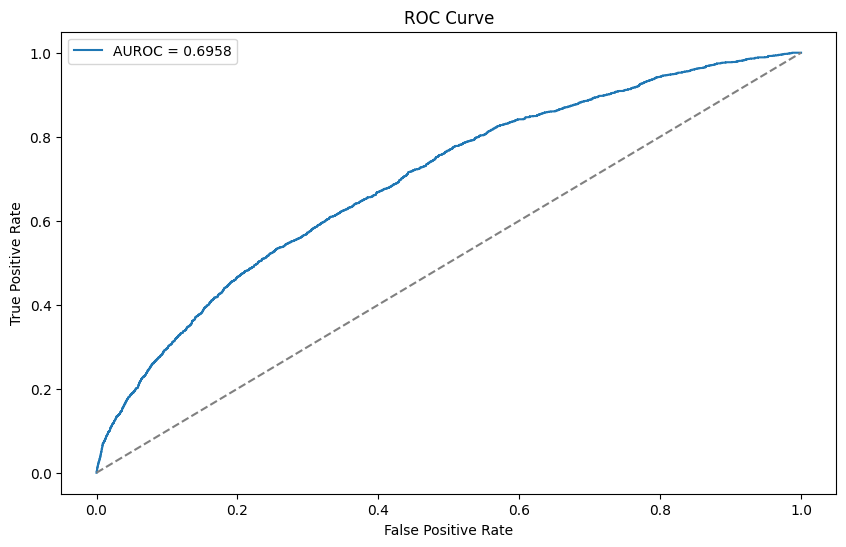

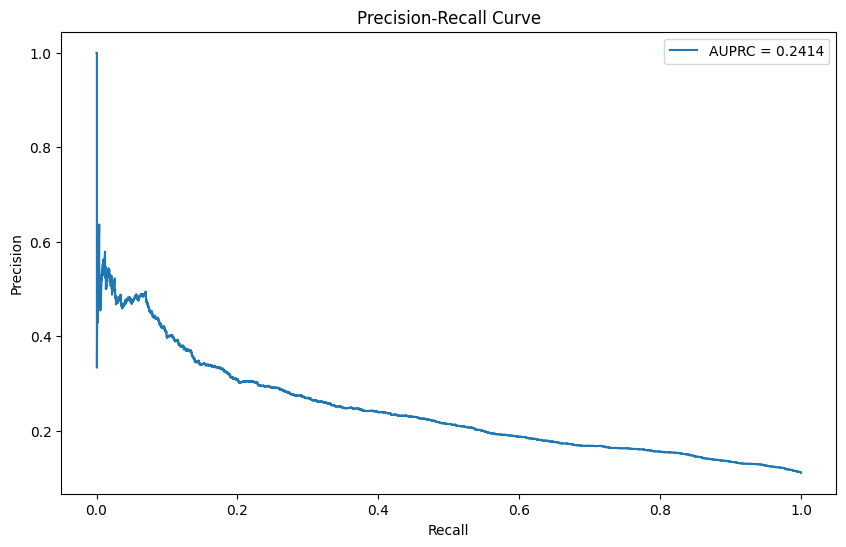

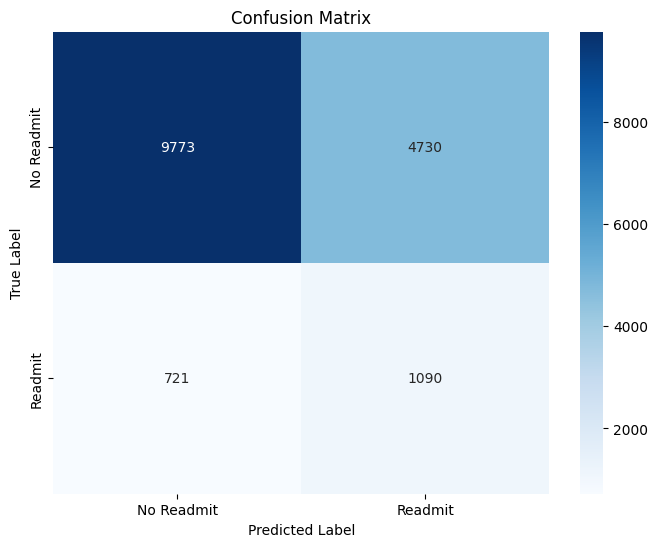

In [31]:
# Calculate metrics for the dev set
from sklearn.metrics import roc_auc_score, average_precision_score, brier_score_loss
import matplotlib.pyplot as plt

dev = pd.read_csv(DEV_PATH)

X_dev = dev.drop(columns=["readmit30"])
y_dev = dev["readmit30"].astype(int)

# Calculate metrics
y_true = y_dev.astype(int)
y_pred = clf.predict_proba(X_dev)[:, 1]

auroc = roc_auc_score(y_true, y_pred)
auprc = average_precision_score(y_true, y_pred)
brier = brier_score_loss(y_true, y_pred)

print(f'AUROC: {auroc:.4f}')
print(f'AUPRC: {auprc:.4f}')
print(f'Brier Score: {brier:.4f}')

# Create figures
plt.figure(figsize=(10, 6))

# Histogram of predicted probabilities
plt.hist(y_pred, bins=20, alpha=0.7, label='Predicted Probabilities')
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Scatter plot of true vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.5, label='True vs Predicted')
plt.title('True vs Predicted Probabilities')
plt.xlabel('True Labels')
plt.ylabel('Predicted Probabilities')
plt.legend()
plt.show()

# Create ROC Curve
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_true, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUROC = {auroc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Create Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_true, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'AUPRC = {auprc:.4f}')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Create Confusion Matrix Heatmap
from sklearn.metrics import confusion_matrix
import seaborn as sns

threshold = 0.5  # Default threshold for binary classification
y_pred_binary = (y_pred >= threshold).astype(int)
cm = confusion_matrix(y_true, y_pred_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Readmit', 'Readmit'], yticklabels=['No Readmit', 'Readmit'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Week 3 Implement: Supervised ML**

In [35]:
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.metrics import roc_auc_score, average_precision_score, brier_score_loss


In [36]:
# Identify categorical and numeric columns
cat_cols = [c for c in X_train.columns if X_train[c].dtype == "object"]
num_cols = [c for c in X_train.columns if c not in cat_cols]

print("Num cols:", len(num_cols))
print("Cat cols:", len(cat_cols))


Num cols: 14
Cat cols: 36


In [38]:
# 1 = logistic regression, 4 = HGB (tree boosting)
method = 4

In [40]:
# build supervised models
clf = None

if method == 1:
    # Preprocess for Logistic Regression
    preprocess_lr = ColumnTransformer(
        transformers=[
            ("num", Pipeline([
                ("imputer", SimpleImputer(strategy="median")),
                ("scaler", StandardScaler()),
            ]), num_cols),

            ("cat", Pipeline([
                ("imputer", SimpleImputer(strategy="most_frequent")),
                ("ohe", OneHotEncoder(handle_unknown="ignore")),
            ]), cat_cols),
        ],
        remainder="drop",
    )

    clf = Pipeline([
        ("preprocess", preprocess_lr),
        ("model", LogisticRegression(
            max_iter=2000,
            solver="liblinear",
            class_weight="balanced",
            random_state=42
        ))
    ])

    clf.fit(X_train, y_train)

elif method == 4:
    # Preprocess for HistGradientBoosting
    # HGB requires numeric input -> ordinal-encode categoricals
    preprocess_hgb = ColumnTransformer(
        transformers=[
            ("num", Pipeline([
                ("imputer", SimpleImputer(strategy="median")),
            ]), num_cols),

            ("cat", Pipeline([
                ("imputer", SimpleImputer(strategy="most_frequent")),
                ("ord", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)),
            ]), cat_cols),
        ],
        remainder="drop",
    )

    clf = Pipeline([
        ("preprocess", preprocess_hgb),
        ("model", HistGradientBoostingClassifier(
            max_depth=6,
            learning_rate=0.05,
            max_iter=400,
            min_samples_leaf=30,
            l2_regularization=1.0,
            early_stopping=True,
            random_state=42,
        ))
    ])

    #  Class imbalance handling via sample_weight
    y_arr = np.asarray(y_train)
    n_pos = (y_arr == 1).sum()
    n_neg = (y_arr == 0).sum()
    pos_weight = n_neg / max(n_pos, 1)

    sample_weight = np.where(y_arr == 1, pos_weight, 1.0)

    clf.fit(X_train, y_train, model__sample_weight=sample_weight)

else:
    raise ValueError("Unknown method. Use method=1 or method=4.")


In [41]:
p_dev = clf.predict_proba(X_dev)[:, 1]

auroc = roc_auc_score(y_dev, p_dev)
auprc = average_precision_score(y_dev, p_dev)
brier = brier_score_loss(y_dev, p_dev)

print(f"Dev AUROC: {auroc:.4f}")
print(f"Dev AUPRC: {auprc:.4f}")
print(f"Dev Brier: {brier:.4f}")
print(f"Dev prevalence: {np.mean(y_dev):.4f}")

print("p_dev min/max:", p_dev.min(), p_dev.max())
print("Any NaNs?:", np.isnan(p_dev).any())


Dev AUROC: 0.6955
Dev AUPRC: 0.2425
Dev Brier: 0.2135
Dev prevalence: 0.1110
p_dev min/max: 0.04591260175653969 0.929736090088357
Any NaNs?: False


In [42]:
# calibration
from sklearn.calibration import CalibratedClassifierCV

# Calibrate using training data only, via CV (no dev leakage)
cal_clf = CalibratedClassifierCV(
    estimator=clf,
    method="sigmoid",  # try "isotonic" too
    cv=3
)
cal_clf.fit(X_train, y_train)

p_dev_cal = cal_clf.predict_proba(X_dev)[:, 1]

print("Calibrated Dev AUROC:", roc_auc_score(y_dev, p_dev_cal))
print("Calibrated Dev AUPRC:", average_precision_score(y_dev, p_dev_cal))
print("Calibrated Dev Brier:", brier_score_loss(y_dev, p_dev_cal))


Calibrated Dev AUROC: 0.6002362541720552
Calibrated Dev AUPRC: 0.18638995377015607
Calibrated Dev Brier: 0.13538476136107966


**Week 3: Unsupervised ML Model**


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE


In [45]:
# 0) Copy your training features; drop obvious identifiers
X_unsup = X_train.copy()

# row_id is an encounter identifier, not a clinical feature → drop for distance-based methods
if "row_id" in X_unsup.columns:
    X_unsup = X_unsup.drop(columns=["row_id"])

# 1) Identify column types
cat_cols_u = [c for c in X_unsup.columns if X_unsup[c].dtype == "object"]
num_cols_u = [c for c in X_unsup.columns if c not in cat_cols_u]

print(f"Unsupervised: {len(num_cols_u)} numeric, {len(cat_cols_u)} categorical")


Unsupervised: 13 numeric, 36 categorical


In [46]:
# 2) Leakage-safe preprocessing:
# - numeric: median impute + standardize
# - categorical: most-frequent impute + onehot
# This matches the lecture "ColumnTransformer + Pipeline" safe default. :contentReference[oaicite:2]{index=2}

num_pipe_u = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scale", StandardScaler()),
])

cat_pipe_u = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
])

preprocess_unsup = ColumnTransformer([
    ("num", num_pipe_u, num_cols_u),
    ("cat", cat_pipe_u, cat_cols_u),
], remainder="drop")


In [47]:
# 3) Dimensionality reduction for mixed/tabular + one-hot:
# TruncatedSVD works well on sparse one-hot outputs (like "PCA for sparse matrices")
svd = TruncatedSVD(n_components=50, random_state=42)

Z50 = Pipeline([
    ("prep", preprocess_unsup),
    ("svd", svd),
]).fit_transform(X_unsup)

print("Reduced representation shape:", Z50.shape)


Reduced representation shape: (65003, 50)


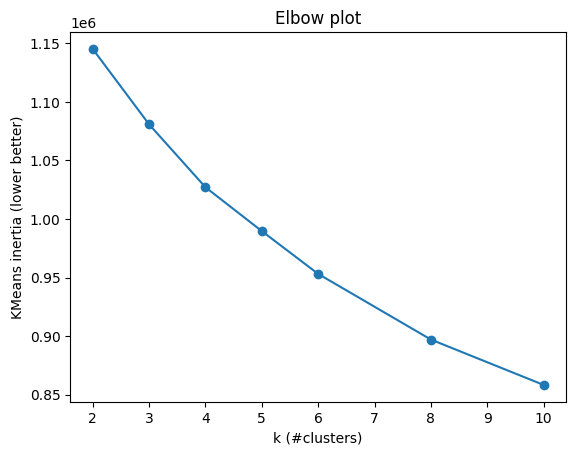

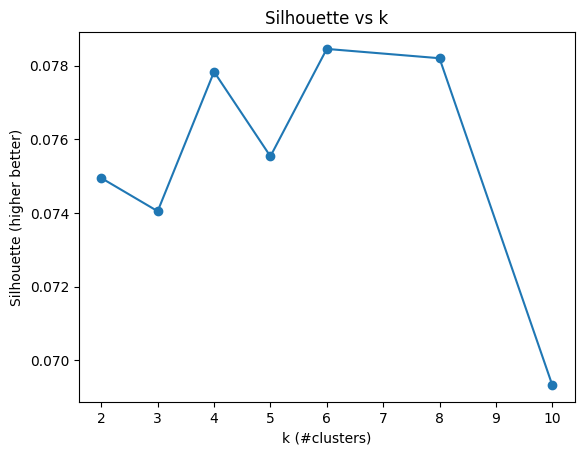

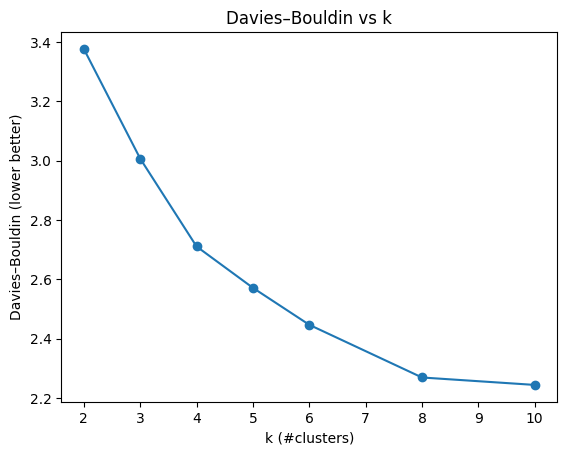

In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

ks = [2, 3, 4, 5, 6, 8, 10]
inertias, silhouettes, dbs = [], [], []

for k in ks:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels_k = km.fit_predict(Z50)

    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(Z50, labels_k))
    dbs.append(davies_bouldin_score(Z50, labels_k))

# Plot quick model-selection curves (internal metrics) :contentReference[oaicite:3]{index=3}
plt.figure()
plt.plot(ks, inertias, marker="o")
plt.xlabel("k (#clusters)")
plt.ylabel("KMeans inertia (lower better)")
plt.title("Elbow plot")
plt.show()

plt.figure()
plt.plot(ks, silhouettes, marker="o")
plt.xlabel("k (#clusters)")
plt.ylabel("Silhouette (higher better)")
plt.title("Silhouette vs k")
plt.show()

plt.figure()
plt.plot(ks, dbs, marker="o")
plt.xlabel("k (#clusters)")
plt.ylabel("Davies–Bouldin (lower better)")
plt.title("Davies–Bouldin vs k")
plt.show()


In [49]:
# Pick a k (I pick 8 based on the graph).
k_final = 8
kmeans = KMeans(n_clusters=k_final, n_init=20, random_state=42)
cluster_labels = kmeans.fit_predict(Z50)

print("Cluster counts:")
print(pd.Series(cluster_labels).value_counts().sort_index())


Cluster counts:
0     2358
1     9531
2    13622
3     1351
4     4402
5    10922
6    17930
7     4887
Name: count, dtype: int64


,n,readmit_rate
cluster,,
0,2358,0.294317
1,9531,0.120239
2,13622,0.094186
3,1351,0.138416
4,4402,0.155611
5,10922,0.081670
6,17930,0.102287
7,4887,0.109474


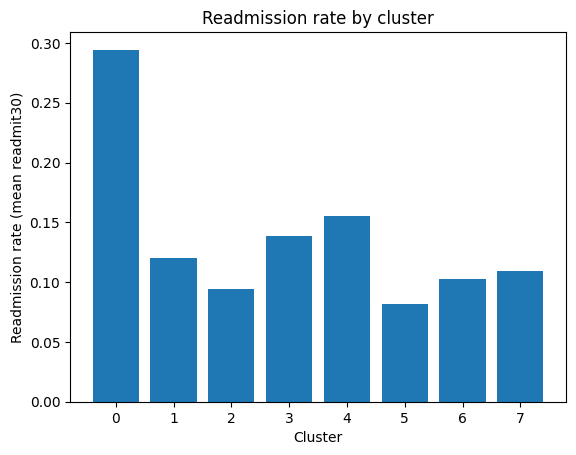

In [51]:
cluster_df = X_train.copy()
cluster_df["cluster"] = cluster_labels
cluster_df["readmit30"] = y_train.values

rate_by_cluster = cluster_df.groupby("cluster")["readmit30"].mean().sort_index()
count_by_cluster = cluster_df["cluster"].value_counts().sort_index()

summary = pd.DataFrame({
    "n": count_by_cluster,
    "readmit_rate": rate_by_cluster
})
display(summary)

plt.figure()
plt.bar(summary.index.astype(str), summary["readmit_rate"])
plt.xlabel("Cluster")
plt.ylabel("Readmission rate (mean readmit30)")
plt.title("Readmission rate by cluster")
plt.show()


,encounter_id,patient_nbr,num_lab_procedures,discharge_disposition_id,num_medications,admission_source_id,number_outpatient,time_in_hospital,number_inpatient,admission_type_id
cluster,,,,,,,,,,
0,1.866906e+08,6.119815e+07,45.451230,3.042409,17.056828,6.016115,0.614928,4.610687,4.829092,1.610263
1,1.650017e+08,5.374381e+07,58.096947,3.461442,26.407407,4.826461,0.198195,8.382961,0.557339,1.787011
2,9.094796e+07,2.334875e+07,45.100793,1.808765,11.504331,5.650565,0.063133,3.497284,0.406475,1.348627
3,2.193078e+08,7.515124e+07,45.646188,3.124352,17.271651,5.302739,6.501110,4.275352,1.013323,1.835677
4,9.922347e+07,2.692313e+07,43.146979,19.821445,16.473648,4.731486,0.110859,5.233757,0.527033,2.103589
5,1.797937e+08,6.210670e+07,26.127815,1.937374,14.785479,1.800861,0.266893,2.987548,0.331075,2.919246
6,2.421170e+08,8.034685e+07,44.829838,2.469492,14.186280,6.311099,0.280033,3.588678,0.476129,1.279587
7,9.285891e+07,4.564733e+07,37.015142,4.033968,16.091263,15.376918,0.493145,4.153059,0.553714,5.259669


<Figure size 640x480 with 0 Axes>

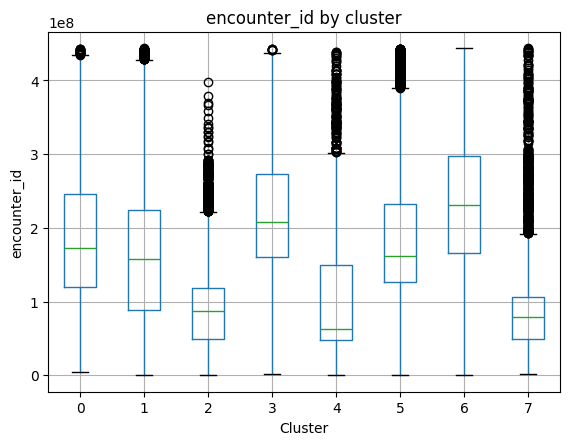

<Figure size 640x480 with 0 Axes>

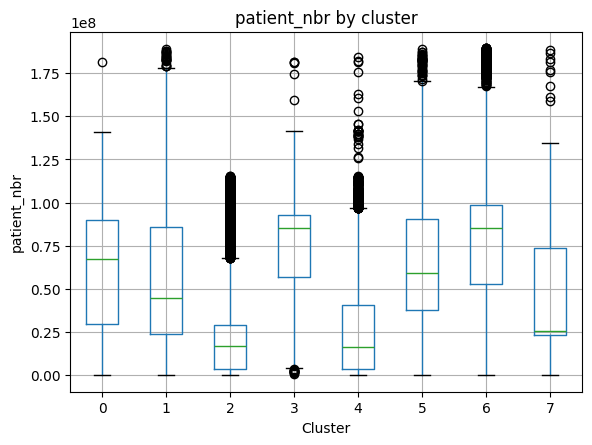

<Figure size 640x480 with 0 Axes>

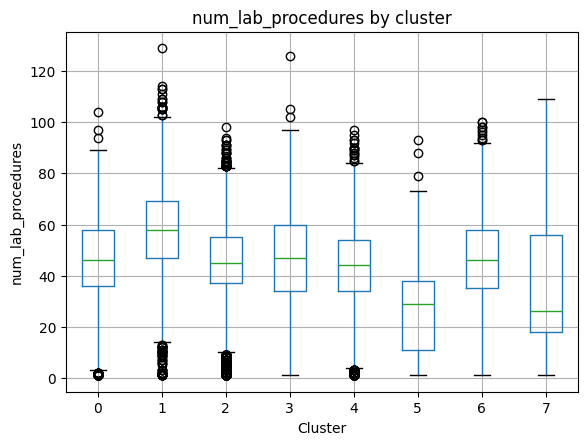

<Figure size 640x480 with 0 Axes>

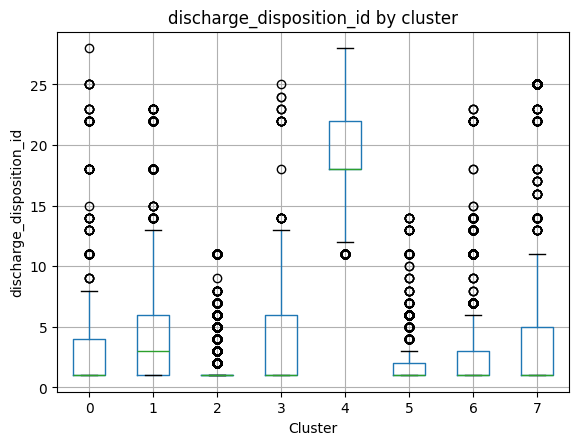

<Figure size 640x480 with 0 Axes>

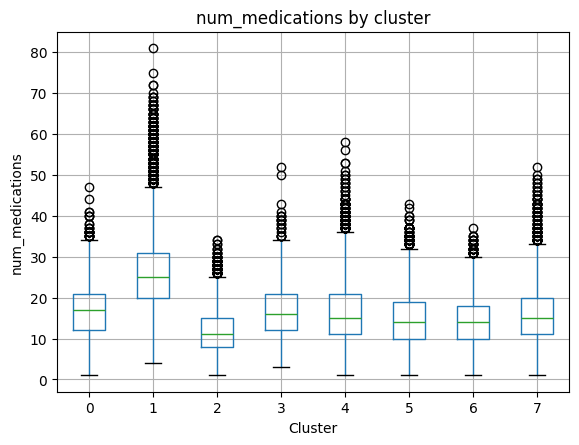

<Figure size 640x480 with 0 Axes>

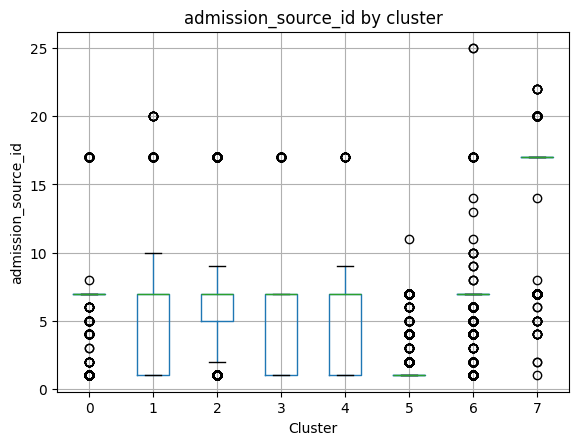

In [52]:
# Compare numeric means across clusters (top differences)
num_profile = cluster_df.groupby("cluster")[num_cols_u].mean()

# rank numeric features by spread across clusters (simple, interpretable heuristic)
spread = (num_profile.max(axis=0) - num_profile.min(axis=0)).sort_values(ascending=False)

top_num = spread.head(10).index.tolist()
display(num_profile[top_num])

# Visualize top 6 numeric features across clusters
top6 = top_num[:6]
for col in top6:
    plt.figure()
    cluster_df.boxplot(column=col, by="cluster")
    plt.title(f"{col} by cluster")
    plt.suptitle("")
    plt.xlabel("Cluster")
    plt.ylabel(col)
    plt.show()


In [53]:
# For categorical columns, show the top category per cluster (by frequency)
for c in cat_cols_u[:8]:  # limit to first 8 to keep output readable
    tab = (
        cluster_df.groupby(["cluster", c])
        .size()
        .reset_index(name="count")
    )
    tab["pct_in_cluster"] = tab["count"] / tab.groupby("cluster")["count"].transform("sum")
    top = tab.sort_values(["cluster", "pct_in_cluster"], ascending=[True, False]).groupby("cluster").head(1)

    print(f"\nTop category per cluster for: {c}")
    display(top[["cluster", c, "pct_in_cluster"]].reset_index(drop=True))



Top category per cluster for: race


,cluster,race,pct_in_cluster
0,0,Caucasian,0.698897
1,1,Caucasian,0.754380
2,2,Caucasian,0.603803
3,3,Caucasian,0.855662
4,4,Caucasian,0.714221
5,5,Caucasian,0.805164
6,6,Caucasian,0.792248
7,7,Caucasian,0.835891



Top category per cluster for: gender


,cluster,gender,pct_in_cluster
0,0,Female,0.596692
1,1,Female,0.526597
2,2,Female,0.550800
3,3,Female,0.586232
4,4,Female,0.542708
5,5,Female,0.510621
6,6,Female,0.542387
7,7,Female,0.531819



Top category per cluster for: age


,cluster,age,pct_in_cluster
0,0,[60-70),0.202714
1,1,[70-80),0.273843
2,2,[70-80),0.227426
3,3,[70-80),0.292376
4,4,[70-80),0.306679
5,5,[60-70),0.263230
6,6,[70-80),0.256609
7,7,[70-80),0.284019



Top category per cluster for: weight


,cluster,weight,pct_in_cluster
0,0,?,0.971162
1,1,?,0.963802
2,2,?,0.990310
3,3,?,0.870466
4,4,?,0.996138
5,5,?,0.966123
6,6,?,0.966592
7,7,?,0.942910



Top category per cluster for: payer_code


,cluster,payer_code,pct_in_cluster
0,0,MC,0.349025
1,1,?,0.390305
2,2,?,0.596462
3,3,MC,0.489267
4,4,?,0.731940
5,5,MC,0.329335
6,6,MC,0.473006
7,7,?,0.798854



Top category per cluster for: medical_specialty


,cluster,medical_specialty,pct_in_cluster
0,0,?,0.483885
1,1,?,0.492918
2,2,InternalMedicine,0.323814
3,3,?,0.740192
4,4,?,0.572240
5,5,?,0.403864
6,6,?,0.699665
7,7,?,0.349908



Top category per cluster for: diag_1


,cluster,diag_1,pct_in_cluster
0,0,428,0.102205
1,1,414,0.106600
2,2,428,0.068052
3,3,428,0.088083
4,4,434,0.065425
5,5,414,0.139077
6,6,428,0.086949
7,7,428,0.069368



Top category per cluster for: diag_2


,cluster,diag_2,pct_in_cluster
0,0,276,0.097964
1,1,428,0.087714
2,2,250,0.098737
3,3,428,0.079941
4,4,428,0.077919
5,5,250,0.104468
6,6,276,0.091969
7,7,250,0.070186


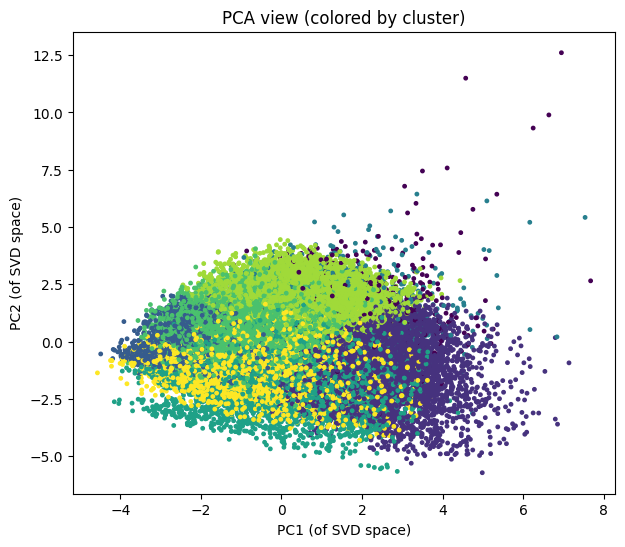

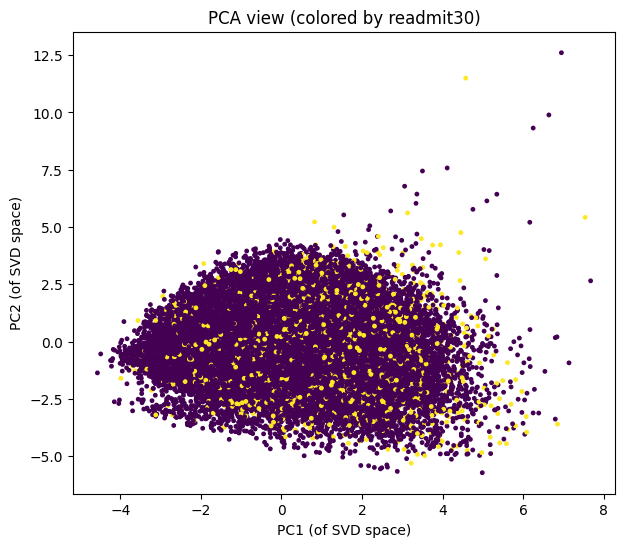

Explained variance ratio (PCA on SVD space): [0.11446501 0.10027375]


In [54]:
from sklearn.decomposition import PCA

# PCA on the 50D representation (fast)
pca2 = PCA(n_components=2, random_state=42)
P2 = pca2.fit_transform(Z50)

plt.figure(figsize=(7,6))
plt.scatter(P2[:,0], P2[:,1], c=cluster_labels, s=6)
plt.xlabel("PC1 (of SVD space)")
plt.ylabel("PC2 (of SVD space)")
plt.title("PCA view (colored by cluster)")
plt.show()

plt.figure(figsize=(7,6))
plt.scatter(P2[:,0], P2[:,1], c=y_train.values, s=6)
plt.xlabel("PC1 (of SVD space)")
plt.ylabel("PC2 (of SVD space)")
plt.title("PCA view (colored by readmit30)")
plt.show()

print("Explained variance ratio (PCA on SVD space):", pca2.explained_variance_ratio_)


#MAINEND

In [43]:
print("Missing values in 'readmit30' column (training data):", train['readmit30'].isnull().sum())
print("Missing values in 'readmit30' column (development data):", dev['readmit30'].isnull().sum())

Missing values in 'readmit30' column (training data): 0
Missing values in 'readmit30' column (development data): 0


## 5) Validate the predictions file format

This checks:
- required columns
- probabilities in [0, 1]
- row_ids match the test file

It assumes the submission notebook wrote `predictions.csv` in the repo root.


In [ ]:
from pathlib import Path
pred_path = Path("predictions.csv")
test_path = Path("Project-1/readmit30/scripts/data/public/public_test.csv")

if not pred_path.exists():
    print("predictions.csv not found. Run notebooks/submission.ipynb first.")
else:
    !python Project-1/readmit30/scripts/validate_submission.py --pred predictions.csv --test Project-1/readmit30/scripts/data/public/public_test.csv


## 6) Commit + push + tag

You will:
- add changes
- commit (pre-commit hook runs here)
- push
- tag a milestone (example: `milestone_wk3`) and push tags



You will need a Personal Access Token (PAT) for the following step. See instructions above.

In [ ]:
# ==== Colab -> GitHub commit/push for a specific notebook path (PAT auth) ====
# What this does:
#  1) clones the repo into the Colab VM
#  2) overwrites the target notebook file with the *currently open* Colab notebook
#  3) commits the change
#  4) asks you for a GitHub PAT and pushes to the target branch
#  5) (optional) creates a git tag and pushes the tag
#
# Notes:
#  - PAT is read via getpass (not echoed). It is only used for this runtime session.
#  - This overwrites the file at TARGET_REL with the *current Colab notebook contents*.

import os
import json
import subprocess
import getpass
from google.colab import _message

# ==========================
# START USER-EDITABLE SETTINGS
# ==========================
# Repo settings
REPO_HTTPS = "https://github.com/joezein71/AIHC-5010-Winter-2026.git"  # full https clone URL ending in .git
REPO_DIR   = "AIHC-5010-Winter-2026"                                # folder name to clone into (or reuse)

# Git settings
BRANCH     = "main"                                                 # branch to commit/push to
COMMIT_MSG = "Update Assignment1_Colab_Workflow.ipynb from Colab test5"    # commit message

# File to overwrite inside the repo (relative to repo root)
TARGET_REL = "Project-1/readmit30/notebooks/Assignment1_Colab_Workflow.ipynb"

# Identity for commits
GIT_USER_NAME  = "Joe Zein"
GIT_USER_EMAIL = "zein.timothy@mayo.edu"

# (Optional) If you want to push to a different remote than REPO_HTTPS, set it here.
# Leave as None to use REPO_HTTPS.
PUSH_REMOTE_HTTPS = None  # e.g. "https://github.com/<user>/<repo>.git"

# Set TAG_NAME to something like "assignment1-submission-v1".
# Leave as "" (empty string) to skip tagging.
TAG_NAME    = "assignment1-submission-v01"  # e.g. "assignment1-submission-v1"
TAG_MESSAGE = "Assignment 1 submission"  # used only for annotated tags
TAG_ANNOTATED = True  # True = annotated tag (-a -m). False = lightweight tag.
# ==========================
# END USER-EDITABLE SETTINGS
# ==========================


def run(cmd, cwd=None, check=True):
    """Run a shell command and stream output."""
    print(f"\n$ {' '.join(cmd)}")
    p = subprocess.run(cmd, cwd=cwd, text=True, capture_output=True)
    if p.stdout:
        print(p.stdout)
    if p.stderr:
        print(p.stderr)
    if check and p.returncode != 0:
        raise RuntimeError(f"Command failed with exit code {p.returncode}: {' '.join(cmd)}")
    return p


def github_authed_remote(https_remote: str, token: str) -> str:
    """
    Convert https://github.com/OWNER/REPO.git into https://TOKEN@github.com/OWNER/REPO.git
    Works for standard GitHub HTTPS remotes.
    """
    if https_remote.startswith("https://"):
        return "https://" + token + "@" + https_remote[len("https://"):]
    raise ValueError("Expected an https remote URL (starting with https://).")


def tag_exists_locally(tag_name: str, cwd: str) -> bool:
    p = subprocess.run(["git", "tag", "-l", tag_name], cwd=cwd, text=True, capture_output=True)
    return p.stdout.strip() == tag_name


REMOTE_FOR_PUSH = PUSH_REMOTE_HTTPS or REPO_HTTPS

# 1) Clone (or reuse existing clone)
if not os.path.isdir(REPO_DIR):
    run(["git", "clone", REPO_HTTPS, REPO_DIR])
else:
    print(f"Repo directory already exists: {REPO_DIR}")

# Ensure we're on the right branch and up-to-date
run(["git", "checkout", BRANCH], cwd=REPO_DIR)
run(["git", "pull", "origin", BRANCH], cwd=REPO_DIR)

# 2) Get the currently-open notebook JSON from Colab
nb = _message.blocking_request("get_ipynb", timeout_sec=30)["ipynb"]

# 3) Overwrite the target file in the clone
target_abs = os.path.join(os.getcwd(), REPO_DIR, TARGET_REL)
os.makedirs(os.path.dirname(target_abs), exist_ok=True)
with open(target_abs, "w", encoding="utf-8") as f:
    json.dump(nb, f, ensure_ascii=False, indent=1)

print("Wrote current Colab notebook to:")
print(" ", target_abs)

# 4) Configure git identity
run(["git", "config", "user.name", GIT_USER_NAME], cwd=REPO_DIR)
run(["git", "config", "user.email", GIT_USER_EMAIL], cwd=REPO_DIR)

# 5) Show status; if no changes, stop early
status = run(["git", "status", "--porcelain"], cwd=REPO_DIR, check=True).stdout.strip()
if not status:
    print("\nNo changes detected in the repo after writing the notebook.")
    print("Double-check that you're running this cell inside the notebook you edited,")
    print("and that TARGET_REL points to the correct path inside the repo.")
else:
    # 6) Add + commit
    run(["git", "add", TARGET_REL], cwd=REPO_DIR)

    commit_proc = subprocess.run(
        ["git", "commit", "-m", COMMIT_MSG],
        cwd=REPO_DIR, text=True, capture_output=True
    )
    if commit_proc.stdout:
        print(commit_proc.stdout)
    if commit_proc.stderr:
        print(commit_proc.stderr)

    combined = (commit_proc.stdout + commit_proc.stderr).lower()
    if commit_proc.returncode != 0 and "nothing to commit" not in combined:
        raise RuntimeError("git commit failed unexpectedly")

    # 7) Ask for PAT and push
    print("\nEnter a GitHub Personal Access Token (PAT) with permission to push to this repo.")
    print("Recommended: fine-grained token with access to the repo and Contents: Read/Write.")
    token = getpass.getpass("GitHub PAT (input hidden): ").strip()
    if not token:
        raise ValueError("No token entered.")

    # Temporarily set authenticated remote URL for this push only (and for tag push)
    authed_remote = github_authed_remote(REMOTE_FOR_PUSH, token)
    run(["git", "remote", "set-url", "origin", authed_remote], cwd=REPO_DIR)

    try:
        # Push commits
        run(["git", "push", "origin", BRANCH], cwd=REPO_DIR)
        print(f"\n Pushed successfully to {BRANCH}.")

        # 8) OPTIONAL: Create + push tag
        if TAG_NAME.strip():
            tag_name = TAG_NAME.strip()

            # If tag already exists locally, don't recreate
            if tag_exists_locally(tag_name, REPO_DIR):
                print(f"Tag already exists locally: {tag_name}")
            else:
                if TAG_ANNOTATED:
                    run(["git", "tag", "-a", tag_name, "-m", TAG_MESSAGE], cwd=REPO_DIR)
                else:
                    run(["git", "tag", tag_name], cwd=REPO_DIR)
                print(f"Created tag: {tag_name}")

            # Push just this tag (or use --tags to push all tags)
            run(["git", "push", "origin", tag_name], cwd=REPO_DIR)
            print(f" Pushed tag: {tag_name}")
        else:
            print("Skipping tag creation (TAG_NAME is empty).")

        print("\nDone. Check GitHub for the new commit (and tag, if set).")

    finally:
        # Restore remote URL without token
        run(["git", "remote", "set-url", "origin", REPO_HTTPS], cwd=REPO_DIR, check=False)


## Done ✅

If you hit issues:
- Make sure you pulled the latest course template (missing files).
- Make sure `data/public/*` exists in your repo (or your instructor provided it separately).
